# Ejemplo 2 Unidad 5

Los siguientes datos corresponden a la velocidad (y), la potencia ($x_{1}$) y la cantidad de cilindros ($x_{2}$) de 10 marcas de motos:

| Velocidad(y) | Potencia($x_{1}$) | Cantidad de cilindros ($x_{2}$) |
|--------------|--------------|----------------------------|
| 160          | 60           | 2                          |
| 156          | 26           | 4                          |
| 193          | 80           | 6                          |
| 191          | 67           | 2                          |
| 200          | 70           | 2                          |
| 190          | 70           | 2                          |
| 194          | 70           | 2                          |
| 170          | 36           | 1                          |
| 132          | 27           | 1                          |
| 111          | 17           | 1                          |

In [5]:
vel <- c(160, 156, 193, 191, 200, 190, 194, 170, 132, 111)
pot <- c(60, 26, 80, 67, 70, 70, 70, 36, 27, 17)
cil <- c(2, 4, 6, 2, 2, 2, 2, 1, 1, 1)
motos <- data.frame(vel, pot, cil)

ml_motos <- lm(vel ~ pot + cil, data=motos)
summary(ml_motos)

my_anova <- aov(ml_motos, type=3)
summary(my_anova)


Call:
lm(formula = vel ~ pot + cil, data = motos)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.468  -9.292   2.029   8.642  19.431 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 108.8659    12.6442   8.610 5.69e-05 ***
pot           1.1502     0.2381   4.831   0.0019 ** 
cil           0.2943     3.5187   0.084   0.9357    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.06 on 7 degrees of freedom
Multiple R-squared:  0.8032,	Adjusted R-squared:  0.7469 
F-statistic: 14.28 on 2 and 7 DF,  p-value: 0.003383


Warning message:
"In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument 'type' will be disregarded"

            Df Sum Sq Mean Sq F value  Pr(>F)   
pot          1   6477    6477  28.557 0.00107 **
cil          1      2       2   0.007 0.93569   
Residuals    7   1588     227                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

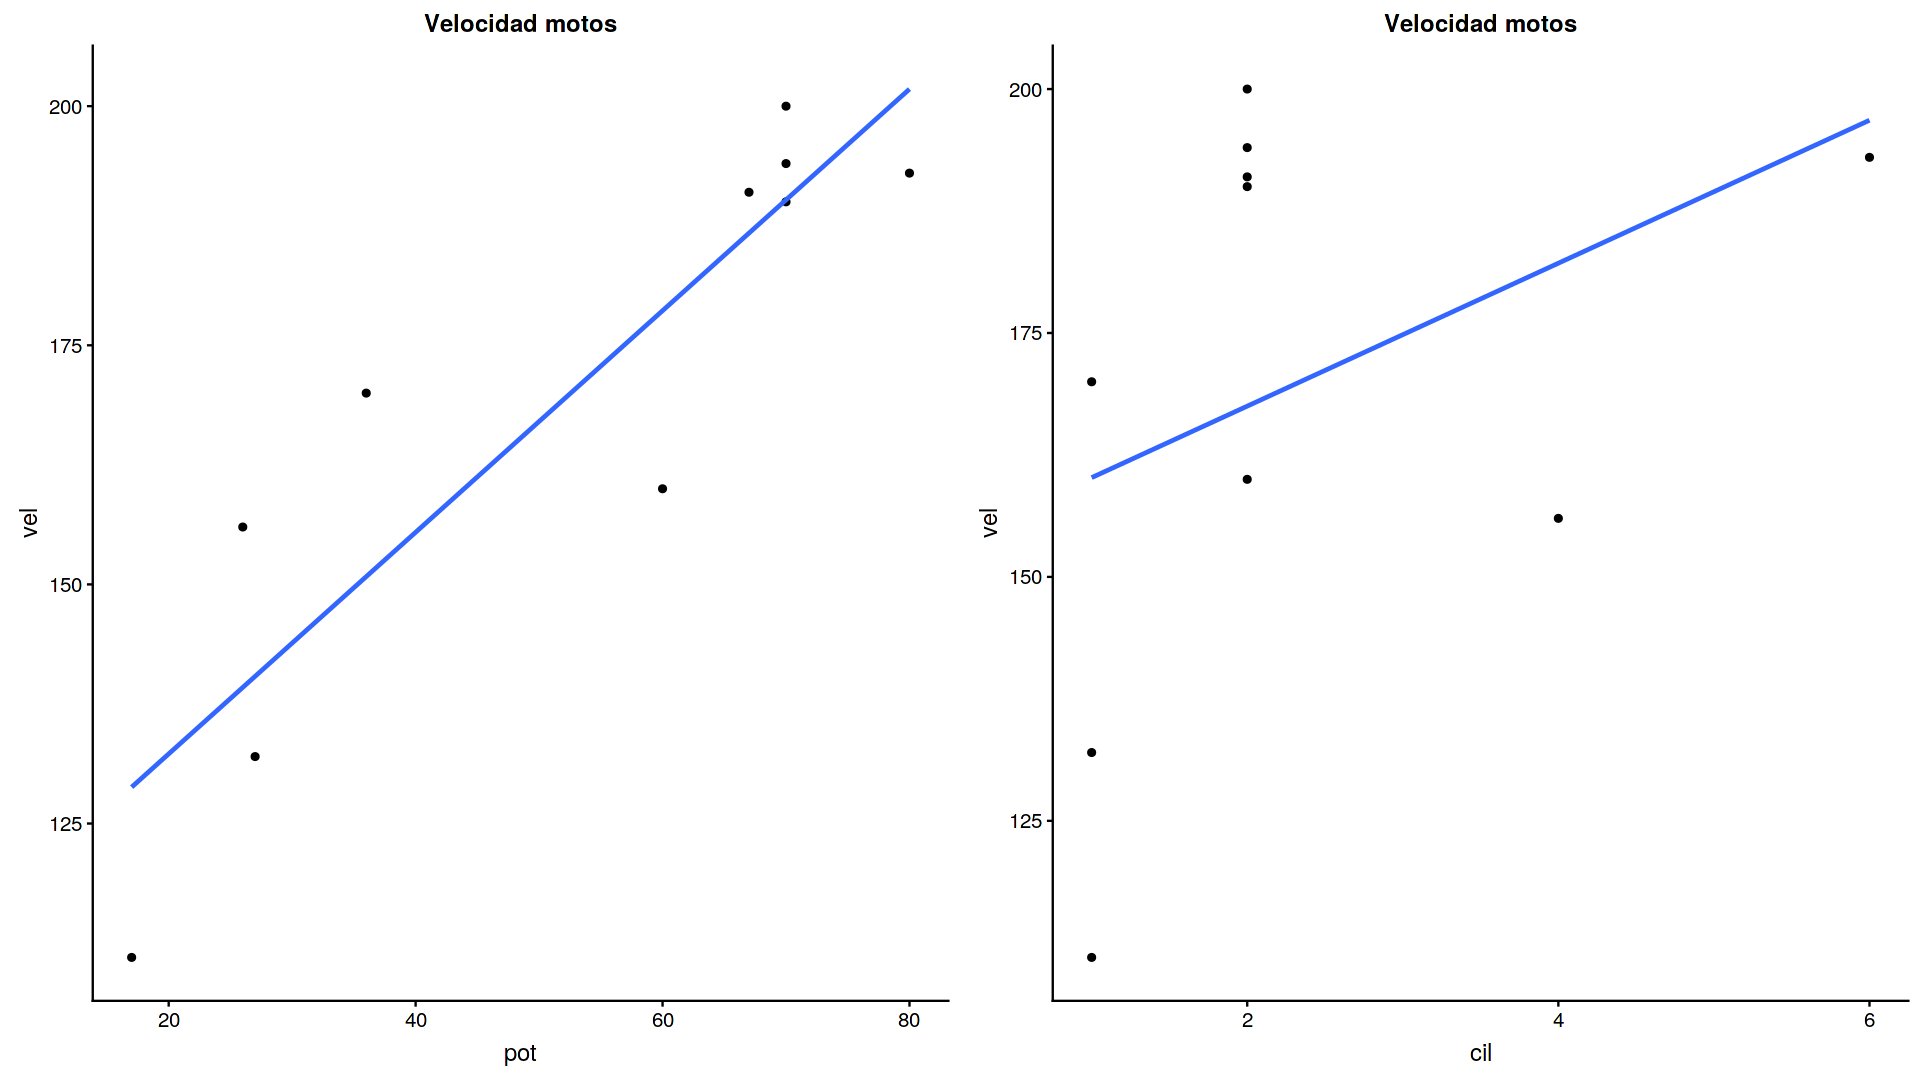

In [2]:
#Escondemos mensajes para que no los imprima en el notebook
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))

# Se cambia el tamaño del gráfico a 16x9 pulgadas
options(repr.plot.width=16, repr.plot.height=9)

moto_potencia <- motos %>%
  ggplot(aes(x=pot, y=vel)) +
    ggtitle("Velocidad motos") +
    theme(plot.title = element_text(hjust = 0.5)) + # Para centrar título de la gráfica
    geom_point(stat="identity") +
    geom_smooth(method="lm" , se = FALSE) #Esto es para agregar la línea
    # se  = FALSE es para no mostrar el intervalo de confianza

moto_cilindros <- motos %>%
  ggplot(aes(x=cil, y=vel)) +
    ggtitle("Velocidad motos") +
    theme(plot.title = element_text(hjust = 0.5)) + # Para centrar título de la gráfica
    geom_point(stat="identity") +
    geom_smooth(method="lm" , se = FALSE) #Esto es para agregar la línea
    # se  = FALSE es para no mostrar el intervalo de confianza

plot_grid(moto_potencia, moto_cilindros)

      vel              pot              cil        
 Min.   :0.3835   Min.   :0.4137   Min.   :0.3835  
 1st Qu.:0.6398   1st Qu.:0.6549   1st Qu.:0.3986  
 Median :0.8961   Median :0.8961   Median :0.4137  
 Mean   :0.7598   Mean   :0.7699   Mean   :0.5990  
 3rd Qu.:0.9480   3rd Qu.:0.9480   3rd Qu.:0.7068  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

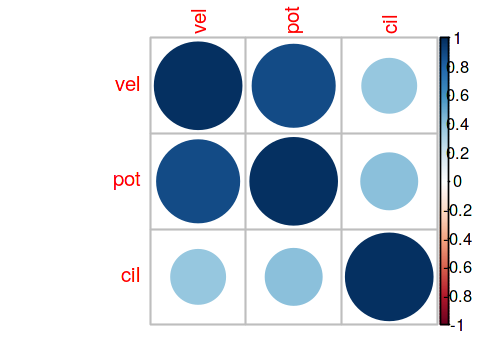

In [3]:
#Escondemos mensajes para que no los imprima en el notebook
suppressMessages(library(corrplot))
cor_motos <- cor(motos)

summary(cor_motos)

# Se cambia el tamaño del gráfico a 16x9 pulgadas
options(repr.plot.width=4, repr.plot.height=3)
corrplot(cor_motos, method="circle")

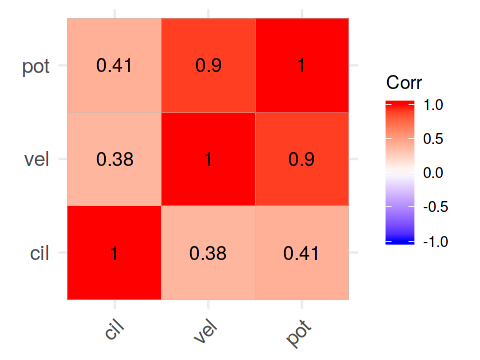

In [4]:
#Escondemos mensajes para que no los imprima en el notebook
suppressMessages(library(ggcorrplot))
options(repr.plot.width=4, repr.plot.height=3)

p.matCMotos <- cor_pmat(cor_motos, method=c("spearman"), use="complete.obs")

ggcorrplot(
    cor_motos, #datos
    method="square", #Para cambiar de cuadros a círculos es circle
    hc.order = TRUE, # Para ordenar acorde a los valores
    lab = TRUE #Para poner las etiquetas en cada punto
    #,p.mat=p.matCMotos # Para tachar los valores que no son estadísticamente significativos.
)

In [5]:
#alfa <- (1 -.95)/2
nrow(motos)
mis_df <- nrow(motos) - (ncol(motos)+1)
qt(.975, df = 8)

pt(2.04, df = 8)

mis_df<-99

[1] 10

[1] 2.306004

[1] 0.9621631

Este es mi variable {{mis_df}}